In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


##  Dünya Mutluluk Raporu Analizi: Toplumsal Refahın Faktörleri ve Değişimleri. 

Bu proje, 2012 yılından bu yana yayınlanan ve dünya genelinde 155 ülkenin mutluluk seviyelerini sıralayan Dünya Mutluluk Raporları veri setini temel almaktadır. Toplumların genel refah düzeylerini anlamak ve daha mutlu toplumlar oluşturulmasına katkı sağlamak amacıyla bu veri seti derinlemesine incelenecektir.

Mutluluk seviyelerinin belirlenmesinde altı temel faktör göz önüne alınmaktadır:

**Ekonomik Üretim (GDP per Capita):** Kişi başına düşen gayri safi yurt içi hasıla.

**Sosyal Destek (Social Support):** Zor zamanlarda güvenilebilecek birilerinin olup olmadığı algısı.

**Yaşam Beklentisi (Healthy Life Expectancy):** Ortalama sağlıklı yaşam süresi.

**Özgürlük (Freedom to make life choices):** Yaşam tercihleri yapma özgürlüğü algısı.

**Yolsuzluğun Olmaması (Perceptions of Corruption):** Hükümette ve iş dünyasında yolsuzluğun yaygınlığı algısı.

**Cömertlik (Generosity):** Başkalarına yardım etme eğilimi.

Proje kapsamında aşağıdaki ana sorulara yanıtlar aranacaktır:

***Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor? Bu, en mutlu toplumların ve onların güçlü olduğu alanların belirlenmesini sağlayacaktır.***

***2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti? Bu analiz, yıllar içindeki mutluluk trendlerini ve belirgin değişimleri ortaya koyacaktır.***

***Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı? Bu soru, mutluluk skorlarında dramatik yükseliş veya düşüş yaşayan ülkelerin tespit edilmesini ve olası nedenlerinin sorgulanmasını sağlayacaktır.***

Bu analizler sonucunda elde edilecek içgörüler, günümüz dünyasında toplumların refahını artırmaya yönelik politikaların geliştirilmesine ışık tutmayı hedeflemektedir.

**🚀 Proje Ortamının Hazırlanması**

Bu bölümde, veri analizi ve görselleştirme işlemlerimiz için gerekli olan Python kütüphanelerini içeri aktaracağız. Ayrıca, oluşturacağımız grafiklerin daha estetik ve okunabilir olması için bazı varsayılan görselleştirme ayarlarını yapılandıracağız.

**📚 Kullanılan Kütüphaneler**

**Pandas:** Veri manipülasyonu ve analizi için kullanılır. Özellikle tablo halindeki verilerle (DataFrame'ler) çalışmak için vazgeçilmezdir.

**NumPy:** Sayısal ve bilimsel hesaplamalar için temel kütüphanedir. Pandas'ın iç yapısında da yoğun olarak kullanılır.

**Matplotlib.pyplot:** Temel grafikler ve veri görselleştirmeleri oluşturmak için kullanılır. Seaborn'un arkasındaki temel görselleştirme aracıdır.

**Seaborn:** Matplotlib üzerine kurulu, daha estetik ve istatistiksel veri görselleştirmeleri oluşturmak için kullanılan bir kütüphanedir.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirmeler için stil ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

**📊 Veri Setlerinin Yüklenmesi ve Birleştirilmesi**

Bu aşamada, Dünya Mutluluk Raporu projesi için gerekli olan 2015, 2016 ve 2017 yıllarına ait veri setlerini yükledik. Ham verilerdeki tutarsızlıkları gidermek ve analiz için tek, temiz bir yapı oluşturmak amacıyla bu veri setlerini standardize ettik ve tek bir DataFrame'de birleştirdik.

In [3]:
# 2015, 2016 ve 2017 verilerini yükleyelim
df_2015 = pd.read_csv("/kaggle/input/world-happiness/2015.csv")
df_2016 = pd.read_csv("/kaggle/input/world-happiness/2016.csv")
df_2017 = pd.read_csv("/kaggle/input/world-happiness/2017.csv")

# Her veri setine bir 'Yıl' sütunu ekleyelim
df_2015['Yıl'] = 2015
df_2016['Yıl'] = 2016
df_2017['Yıl'] = 2017

# Sütun isimlerini tutarlı hale getirelim.
# Tüm veri setlerinde ortak olan veya benzer anlama gelen sütunları belirleyelim.

# Örnek olarak 2015 ve 2016'daki 'Economy (GDP per Capita)' sütun adını 'GDP per Capita' yapalım
df_2015.rename(columns={'Economy (GDP per Capita)': 'GDP per Capita',
                        'Happiness Rank': 'Sıralama',
                        'Happiness Score': 'Mutluluk Skoru',
                        'Standard Error': 'Standart Hata',
                        'Family': 'Sosyal Destek',
                        'Health (Life Expectancy)': 'Yaşam Beklentisi',
                        'Freedom': 'Özgürlük',
                        'Trust (Government Corruption)': 'Yolsuzluk Algısı',
                        'Generosity': 'Cömertlik',
                        'Dystopia Residual': 'Dystopia Kalıntısı'}, inplace=True)

df_2016.rename(columns={'Economy (GDP per Capita)': 'GDP per Capita',
                        'Happiness Rank': 'Sıralama',
                        'Happiness Score': 'Mutluluk Skoru',
                        'Lower Confidence Interval': 'Alt Güven Aralığı',
                        'Upper Confidence Interval': 'Üst Güven Aralığı',
                        'Family': 'Sosyal Destek',
                        'Health (Life Expectancy)': 'Yaşam Beklentisi',
                        'Freedom': 'Özgürlük',
                        'Trust (Government Corruption)': 'Yolsuzluk Algısı',
                        'Generosity': 'Cömertlik',
                        'Dystopia Residual': 'Dystopia Kalıntısı'}, inplace=True)

df_2017.rename(columns={'Happiness.Rank': 'Sıralama',
                        'Happiness.Score': 'Mutluluk Skoru',
                        'Whisker.high': 'Üst Güven Aralığı', # 2017'de farklı isimlendirme
                        'Whisker.low': 'Alt Güven Aralığı', # 2017'de farklı isimlendirme
                        'Economy..GDP.per.Capita.': 'GDP per Capita',
                        'Family': 'Sosyal Destek',
                        'Health..Life.Expectancy.': 'Yaşam Beklentisi',
                        'Freedom': 'Özgürlük',
                        'Trust..Government.Corruption.': 'Yolsuzluk Algısı',
                        'Generosity': 'Cömertlik',
                        'Dystopia.Residual': 'Dystopia Kalıntısı'}, inplace=True)

# Tüm veri setlerindeki ortak sütunları belirleyip birleştirelim
common_columns = ['Country', 'Mutluluk Skoru', 'GDP per Capita', 'Sosyal Destek',
                  'Yaşam Beklentisi', 'Özgürlük', 'Yolsuzluk Algısı', 'Cömertlik', 'Yıl', 'Sıralama']

# 2015 ve 2016'da 'Region' varken 2017'de yok. Birleştirme için 'Region' sütununu hariç tutalım veya 2017'ye ekleyelim.


df_all = pd.concat([df_2015[common_columns], df_2016[common_columns], df_2017[common_columns]], ignore_index=True)

print("Birleştirilmiş Veri Seti İlk 5 Satır:")
print(df_all.head())
print("\nBirleştirilmiş Veri Seti Bilgisi:")
df_all.info()

Birleştirilmiş Veri Seti İlk 5 Satır:
       Country  Mutluluk Skoru  GDP per Capita  Sosyal Destek  \
0  Switzerland           7.587         1.39651        1.34951   
1      Iceland           7.561         1.30232        1.40223   
2      Denmark           7.527         1.32548        1.36058   
3       Norway           7.522         1.45900        1.33095   
4       Canada           7.427         1.32629        1.32261   

   Yaşam Beklentisi  Özgürlük  Yolsuzluk Algısı  Cömertlik   Yıl  Sıralama  
0           0.94143   0.66557           0.41978    0.29678  2015         1  
1           0.94784   0.62877           0.14145    0.43630  2015         2  
2           0.87464   0.64938           0.48357    0.34139  2015         3  
3           0.88521   0.66973           0.36503    0.34699  2015         4  
4           0.90563   0.63297           0.32957    0.45811  2015         5  

Birleştirilmiş Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Da

 #****🔍Değerlendirme****
 
Bu adım, ham verinin analize uygun hale getirilmesi için kritik bir ön işleme aşamasıdır ve başarıyla tamamlanmıştır.

Veri Yükleme ve Yıl Etiketleme: 2015, 2016 ve 2017 yıllarına ait mutluluk raporları sorunsuz bir şekilde yüklendi. Her bir veri setine, verinin hangi yıla ait olduğunu gösteren bir 'Yıl' sütunu eklenmesi, zaman serisi analizleri için temel bir adımdır.

Sütun Adı Standardizasyonu: Farklı yıllardaki veri setlerinde gözlemlenen tutarsız sütun isimleri (Economy (GDP per Capita), Happiness.Rank vb.) başarılı bir şekilde Türkçe ve tutarlı isimlerle (GDP per Capita, Sıralama, Mutluluk Skoru vb.) yeniden adlandırıldı. Bu standardizasyon, veri setlerinin doğru ve hatasız bir şekilde birleştirilmesini sağladı.

Veri Birleştirme (pd.concat): Üç farklı yılın verileri, belirlenen ortak sütunlar baz alınarak df_all adında tek, büyük bir DataFrame'de dikey olarak birleştirildi. df_all.head() çıktısı, birleştirmenin doğru yapıldığını ve yeni sütun adlarının aktif olduğunu açıkça gösteriyor.

Veri Kalitesi Kontrolü (df_all.info()): Bu çıktı, birleştirilmiş veri setinin toplam 470 gözlem (satır) içerdiğini ve 10 sütuna sahip olduğunu belirtir. En önemlisi, Non-Null Count sütunundaki tüm değerlerin 470 olması, veri setinde hiçbir eksik değer bulunmadığını teyit eder. Bu durum, sonraki analiz adımları için mükemmel bir zemin oluşturur ve eksik veri işleme ihtiyacını ortadan kaldırır. Sütunların veri tipleri (float64, int64, object) de analizler için uygun olarak belirlenmiştir.

Bu başarılı ön işleme adımı sayesinde, veri setimiz artık üzerinde daha anlamlı analizler yapmaya ve projemizin sorularına yanıt aramaya tamamen hazırdır.

**✨ Eksik Değer Kontrolü**

Veri analizinde kritik bir adım olan eksik değer (missing value) kontrolünü gerçekleştirdik. Bu adım, veri setimizin bütünlüğünü doğrulamamızı ve sonraki analizlerin güvenilirliğini sağlamamızı sağlar.

In [4]:
print("\nBirleştirilmiş Veri Setinde Eksik Değerler:")
print(df_all.isnull().sum())


Birleştirilmiş Veri Setinde Eksik Değerler:
Country             0
Mutluluk Skoru      0
GDP per Capita      0
Sosyal Destek       0
Yaşam Beklentisi    0
Özgürlük            0
Yolsuzluk Algısı    0
Cömertlik           0
Yıl                 0
Sıralama            0
dtype: int64


**Bu veri setinde önemli bir eksik değer gözükmüyor, ancak her zaman kontrol etmek önemlidir.**

**Eğer olsaydı, **dropna()** veya **fillna()** gibi yöntemler kullanılabilirdi.**

# **🌍 Mutlulukta ve Faktörlerde Lider Ülkeler**

Bu bölümde, her yıl için genel mutluluk skorlarında en üst sıralarda yer alan ülkeleri ve mutluluğa katkıda bulunan altı ana faktörde (Ekonomik Üretim, Sosyal Destek, Yaşam Beklentisi, Özgürlük, Yolsuzluk Algısı, Cömertlik) öne çıkan ülkeleri inceliyoruz. Bu analiz, hangi ülkelerin hangi alanlarda güçlü olduğunu görsel ve sayısal olarak ortaya koyar.

In [5]:
# Her yıl için genel mutlulukta en yüksek 10 ülke
print("\n### Genel Mutlulukta En Yüksek Ülkeler (İlk 10)")
for year in sorted(df_all['Yıl'].unique()):
    top_10_countries = df_all[df_all['Yıl'] == year].sort_values(by='Mutluluk Skoru', ascending=False).head(10)
    print(f"\n--- {year} Yılı ---")
    print(top_10_countries[['Sıralama', 'Country', 'Mutluluk Skoru']])

# Mutluluğa katkıda bulunan faktörlerde en yüksek ülkeler (Her bir faktör için ilk 5)
factors = ['GDP per Capita', 'Sosyal Destek', 'Yaşam Beklentisi', 'Özgürlük', 'Yolsuzluk Algısı', 'Cömertlik']

print("\n### Mutluluğa Katkıda Bulunan Faktörlerde En Yüksek Ülkeler (Her Faktör İçin İlk 5)")
for year in sorted(df_all['Yıl'].unique()):
    print(f"\n--- {year} Yılı ---")
    df_year = df_all[df_all['Yıl'] == year]
    for factor in factors:
        # Bazı faktörlerin değeri yüksek olması pozitif iken (örn. GDP),
        # Yolsuzluk Algısı'nın düşük olması daha iyidir (daha az yolsuzluk).
        # Ancak veri setindeki 'Yolsuzluk Algısı' sütunu yüksek değerin daha iyi olduğunu gösteriyor (daha az algılanan yolsuzluk).
        # Bu nedenle tüm faktörler için yüksek değere göre sıralama yapabiliriz.
        top_countries_factor = df_year.sort_values(by=factor, ascending=False).head(5)
        print(f"\n- En Yüksek {factor} Ülkeleri:")
        print(top_countries_factor[['Country', factor, 'Mutluluk Skoru']])


### Genel Mutlulukta En Yüksek Ülkeler (İlk 10)

--- 2015 Yılı ---
   Sıralama      Country  Mutluluk Skoru
0         1  Switzerland           7.587
1         2      Iceland           7.561
2         3      Denmark           7.527
3         4       Norway           7.522
4         5       Canada           7.427
5         6      Finland           7.406
6         7  Netherlands           7.378
7         8       Sweden           7.364
8         9  New Zealand           7.286
9        10    Australia           7.284

--- 2016 Yılı ---
     Sıralama      Country  Mutluluk Skoru
158         1      Denmark           7.526
159         2  Switzerland           7.509
160         3      Iceland           7.501
161         4       Norway           7.498
162         5      Finland           7.413
163         6       Canada           7.404
164         7  Netherlands           7.339
165         8  New Zealand           7.334
166         9    Australia           7.313
167        10       Sweden      

# **🔍 Değerlendirme**

Bu kapsamlı analiz, Dünya Mutluluk Raporu'nun temel hedeflerinden biri olan "Hangi ülkeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor?" sorusuna detaylı ve yıllara göre ayrıştırılmış yanıtlar sunar.

****📈 Genel Mutlulukta En Yüksek Ülkeler (İlk 10)****

Yıllara göre yapılan inceleme, mutluluk sıralamalarının zirvesinde önemli bir tutarlılık olduğunu gösteriyor.

İskandinav Ülkelerinin Dominasyonu: İsviçre, İzlanda, Danimarka, Norveç ve Finlandiya gibi İskandinav ve Kuzey Avrupa ülkeleri, 2015'ten 2017'ye kadar sürekli olarak ilk 5'te yer alarak genel mutluluk skorlarındaki liderliklerini korudular. Bu durum, bu ülkelerdeki toplumsal yapıların, refah seviyelerinin ve yönetim anlayışlarının mutluluk üzerinde istikrarlı ve pozitif bir etkisi olduğunu düşündürüyor.

Diğer İstikrarlı Ülkeler: Kanada, Hollanda, Yeni Zelanda, Avustralya ve İsveç de yıllar boyunca ilk 10 içerisinde yer alarak yüksek mutluluk seviyelerini sürdüren diğer önemli ülkelerdir.

**Küçük Değişimler:** Yıllar arasında sıralamalarda minor yer değişiklikleri olsa da (örneğin, Danimarka'nın 2016'da birinci olması veya Norveç'in 2017'de zirveye çıkması), genel eğilim ve liste başı ülkelerin profili büyük ölçüde sabit kalmıştır.

📊 Mutluluğa Katkıda Bulunan Faktörlerde En Yüksek Ülkeler (Her Faktör İçin İlk 5)
Bu derinlemesine analiz, ülkelerin mutluluklarına etki eden temel faktörlerdeki performanslarını anlamamızı sağlıyor:

**Ekonomik Üretim (GDP per Capita):**

Katar, Lüksemburg, Singapur ve Kuveyt gibi ülkeler, yüksek kişi başına düşen milli gelirleriyle bu faktörde sürekli olarak zirvede yer alıyor. Bu, ekonomik gücün bireysel refah ve mutluluk üzerindeki doğrudan etkisini ortaya koyuyor.

Genel mutlulukta lider olan Norveç gibi ülkelerin de bu listede yer alması, güçlü ekonomilerin genel mutluluğa önemli katkı sağladığını pekiştiriyor.

**Sosyal Destek (Social Support):**

İzlanda, Danimarka, İrlanda ve Yeni Zelanda gibi ülkeler, güçlü sosyal destek ağlarına sahip olmalarıyla öne çıkıyor. Bu, toplumsal bağların ve karşılıklı güvenin mutluluk için ne kadar önemli olduğunu vurgular.

Özbekistan gibi bazı farklı coğrafyalardan ülkelerin de bu faktörde üst sıralarda yer alması, güçlü sosyal ilişkilerin evrensel bir mutluluk göstergesi olduğunu düşündürüyor.

**Yaşam Beklentisi (Health - Life Expectancy):**

Singapur, Japonya, Güney Kore ve Hong Kong gibi Asya ülkeleri, yüksek yaşam beklentisiyle bu faktörde liderliği elinde tutuyor. Bu, sağlık hizmetlerinin kalitesinin ve genel yaşam koşullarının önemini gösterir.

**Özgürlük (Freedom):**

Norveç, İsviçre ve Danimarka gibi genel mutlulukta da zirvede olan ülkeler, yüksek özgürlük algılarıyla bu listede yer alıyor.

Özbekistan ve Kamboçya gibi bazı ülkelerin de zaman zaman bu faktörde üst sıralara çıkması, bireysel özgürlük algısının sadece gelişmiş ülkelerle sınırlı olmadığını, farklı bağlamlarda da güçlü bir mutluluk faktörü olabileceğini gösterir.

**Yolsuzluk Algısı (Trust - Government Corruption):**

Singapur, Danimarka ve Yeni Zelanda gibi ülkeler, hükümette ve iş dünyasında yolsuzluk algısının düşük olmasıyla dikkat çekiyor. Yüksek yolsuzluk algısı skoru, daha az algılanan yolsuzluk anlamına geldiği için pozitif bir faktördür.

Ruanda ve Katar gibi ülkelerin de bu alanda başarılı olması, iyi yönetişimin ve şeffaflığın mutluluğa olan katkısını gösterir.

**Cömertlik (Generosity):**

Myanmar, Tayland, Endonezya ve Malta gibi ülkeler, yüksek cömertlik skorlarıyla öne çıkıyor. Bu faktör, toplumsal dayanışma ve başkalarına yardım etme eğiliminin mutluluğa yaptığı katkıyı vurgular ve genellikle kültürel değerlerle yakından ilişkilidir.

Bu analiz adımı, projemizin ilk temel sorusunu hem genel sıralamalar hem de alt faktörler bazında tatmin edici bir şekilde yanıtlamıştır. Bir sonraki adımda, yıllar arasındaki değişimleri ve önemli artış/azalışları inceleyeceğiz.

# ****📈 Yıllar Arası Ülke Sıralamaları ve Mutluluk Puanlarındaki Değişim****
Bu bölümde, ülkelerin mutluluk skorları ve sıralamalarının 2015-2016 ve 2016-2017 dönemleri arasında nasıl bir değişim gösterdiğini analiz ediyoruz. Bu, hangi ülkelerin mutluluk seviyelerinde önemli bir artış veya azalma yaşadığını belirlememize yardımcı olacak.

In [7]:
print("\n### Yıllar Arası Ülke Sıralamaları ve Puanlarındaki Değişim")

# Ülkelerin 2015-2016 arasındaki değişimlerini inceleyelim
df_2015_2016_merged = pd.merge(df_2015, df_2016, on='Country', suffixes=('_2015', '_2016'), how='inner')
df_2015_2016_merged['Mutluluk Skoru Değişimi (2016-2015)'] = df_2015_2016_merged['Mutluluk Skoru_2016'] - df_2015_2016_merged['Mutluluk Skoru_2015']
df_2015_2016_merged['Sıralama Değişimi (2016-2015)'] = df_2015_2016_merged['Sıralama_2015'] - df_2015_2016_merged['Sıralama_2016'] # Sıralama azaldıkça iyileşme demektir

print("\n--- 2015-2016 Arası Değişim ---")
print("Mutluluk Skoru Değişimine Göre En Büyük Artışlar (2016 vs 2015):")
print(df_2015_2016_merged.sort_values(by='Mutluluk Skoru Değişimi (2016-2015)', ascending=False).head(5)[['Country', 'Mutluluk Skoru_2015', 'Mutluluk Skoru_2016', 'Mutluluk Skoru Değişimi (2016-2015)']])
print("\nMutluluk Skoru Değişimine Göre En Büyük Azalmalar (2016 vs 2015):")
print(df_2015_2016_merged.sort_values(by='Mutluluk Skoru Değişimi (2016-2015)', ascending=True).head(5)[['Country', 'Mutluluk Skoru_2015', 'Mutluluk Skoru_2016', 'Mutluluk Skoru Değişimi (2016-2015)']])
print("\nSıralama Değişimine Göre En Büyük İyileşmeler (2016 vs 2015):")
print(df_2015_2016_merged.sort_values(by='Sıralama Değişimi (2016-2015)', ascending=False).head(5)[['Country', 'Sıralama_2015', 'Sıralama_2016', 'Sıralama Değişimi (2016-2015)']])


# Ülkelerin 2016-2017 arasındaki değişimlerini inceleyelim
df_2016_2017_merged = pd.merge(df_2016, df_2017, on='Country', suffixes=('_2016', '_2017'), how='inner')
df_2016_2017_merged['Mutluluk Skoru Değişimi (2017-2016)'] = df_2016_2017_merged['Mutluluk Skoru_2017'] - df_2016_2017_merged['Mutluluk Skoru_2016']
df_2016_2017_merged['Sıralama Değişimi (2017-2016)'] = df_2016_2017_merged['Sıralama_2016'] - df_2016_2017_merged['Sıralama_2017']

print("\n--- 2016-2017 Arası Değişim ---")
print("Mutluluk Skoru Değişimine Göre En Büyük Artışlar (2017 vs 2016):")
print(df_2016_2017_merged.sort_values(by='Mutluluk Skoru Değişimi (2017-2016)', ascending=False).head(5)[['Country', 'Mutluluk Skoru_2016', 'Mutluluk Skoru_2017', 'Mutluluk Skoru Değişimi (2017-2016)']])
print("\nMutluluk Skoru Değişimine Göre En Büyük Azalmalar (2017 vs 2016):")
print(df_2016_2017_merged.sort_values(by='Mutluluk Skoru Değişimi (2017-2016)', ascending=True).head(5)[['Country', 'Mutluluk Skoru_2016', 'Mutluluk Skoru_2017', 'Mutluluk Skoru Değişimi (2017-2016)']])
print("\nSıralama Değişimi (2017-2016) - En Büyük İyileşmeler (Sıralama Düşüşü):")
print(df_2016_2017_merged.sort_values(by='Sıralama Değişimi (2017-2016)', ascending=False).head(5)[['Country', 'Sıralama_2016', 'Sıralama_2017', 'Sıralama Değişimi (2017-2016)']])


### Yıllar Arası Ülke Sıralamaları ve Puanlarındaki Değişim

--- 2015-2016 Arası Değişim ---
Mutluluk Skoru Değişimine Göre En Büyük Artışlar (2016 vs 2015):
     Country  Mutluluk Skoru_2015  Mutluluk Skoru_2016  \
66   Algeria                5.605                6.355   
150     Togo                2.839                3.303   
87    Latvia                5.098                5.560   
84   Romania                5.124                5.528   
98   Hungary                4.800                5.145   

     Mutluluk Skoru Değişimi (2016-2015)  
66                                 0.750  
150                                0.464  
87                                 0.462  
84                                 0.404  
98                                 0.345  

Mutluluk Skoru Değişimine Göre En Büyük Azalmalar (2016 vs 2015):
       Country  Mutluluk Skoru_2015  Mutluluk Skoru_2016  \
110    Liberia                4.571                3.622   
21   Venezuela                6.810            

# ****🔍 Değerlendirme****

Bu analiz adımı, projenizin en kritik sorularından biri olan "2015-2016 ve 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?" ile "Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?" sorularına net ve ayrıntılı yanıtlar sunmaktadır. Ülkelerin yıllar içindeki mutluluk dinamiklerini anlamak için çok değerli içgörüler elde ettik.

**📅 2015-2016 Arası Değişimler**

**Mutluluk Skoru En Büyük Artışlar:**

Cezayir (+0.750 puan), bu dönemde mutluluk skorunda en dramatik artışı kaydederek dikkatleri üzerine çekti. Bu, ülkedeki yaşam koşullarında veya algısında önemli bir iyileşmeye işaret ediyor olabilir.

Togo, Letonya, Romanya ve Macaristan da kayda değer yükselişler yaşadı.

**Mutluluk Skoru En Büyük Azalmalar:**

Liberya (-0.949 puan), mutluluk skorunda en keskin düşüşü gösterdi.

Venezuela (-0.726 puan), bu dönemde de önemli bir düşüş yaşayarak ülkedeki artan sosyo-ekonomik ve politik sorunlarla tutarlılık sergiledi.

Haiti, Zimbabve ve Sudan da mutluluk skorlarında belirgin azalmalar gözlemledi.

**Sıralama En Büyük İyileşmeler:**

Cezayir (+30 sıra), mutluluk skorundaki büyük artışına paralel olarak sıralamasını en çok iyileştiren ülke oldu. Bu, ülkenin uluslararası alandaki algısında da büyük bir pozitif değişime işaret eder.

Letonya, Kamerun, Romanya ve Sri Lanka da sıralamalarında önemli sıçramalar kaydetti.

**📅 2016-2017 Arası Değişimler**

**Mutluluk Skoru En Büyük Artışlar:**

Bulgaristan (+0.497 puan), bu dönemde mutluluk skorunda en büyük artışı gösterdi.

Afganistan, Suriye, Mısır ve Güney Afrika da önemli yükselişler kaydetti. Özellikle çatışma veya istikrarsızlık yaşayan ülkelerde dahi küçük de olsa pozitif bir değişim gözlemlenmesi dikkat çekicidir.

**Mutluluk Skoru En Büyük Azalmalar:**

Bu dönemde de en büyük düşüşü Venezuela (-0.834 puan) yaşadı. Bu, ülkenin içinde bulunduğu krizin derinleştiğini veya devam ettiğini güçlü bir şekilde vurguluyor.

İlginç bir şekilde, 2015-2016 arasında en büyük artışı yaşayan Cezayir (-0.483 puan), bu dönemde önemli bir düşüş yaşayarak mutluluk skorunun ne kadar değişken olabileceğini gösterdi.

Haiti, Zimbabve ve Tanzanya da mutluluk skorlarında kayda değer azalmalar yaşadı.

**Sıralama En Büyük İyileşmeler:**

Bulgaristan (+24 sıra), mutluluk skorundaki artışına paralel olarak sıralamasını en çok iyileştiren ülke oldu.

Mısır, Gabon, Macaristan ve Güney Afrika da sıralamalarında belirgin ilerlemeler kaydetti.

# ****🎯 Genel Değerlendirme****
Bu analizler, ülkelerin mutluluk düzeylerinin dinamik olduğunu ve yıllar içinde önemli değişimler gösterebileceğini net bir şekilde ortaya koymuştur. Bazı ülkeler istikrarlı bir şekilde refahlarını artırırken, diğerleri krizler veya iç sorunlar nedeniyle düşüşler yaşayabilir. Bu değişimler genellikle sosyo-ekonomik, politik veya çevresel faktörlerle yakından ilişkilidir. Özellikle Venezuela'nın her iki dönemde de mutluluk skorunda keskin düşüşler yaşaması, ülkedeki derinleşen sorunların bir yansıması olarak öne çıkmaktadır.

Bu analiz adımıyla birlikte, projenizin temel sorularına oldukça kapsamlı yanıtlar sağlamış olduk. Şimdi bulgularımızı daha anlaşılır kılmak için görselleştirmelerle devam edebiliriz.

# ****📊 Temel Bulguların Görselleştirilmesi****
Veri analizinden elde ettiğimiz içgörüleri daha anlaşılır kılmak için çeşitli görselleştirmeler oluşturalım. Bu grafikler, mutluluk trendlerini, faktörlerin etkilerini ve ülke değişimlerini net bir şekilde gözler önüne serecek


### Mutluluk Skorlarının Yıllara Göre En Yüksek Ülkeler Grafikleri


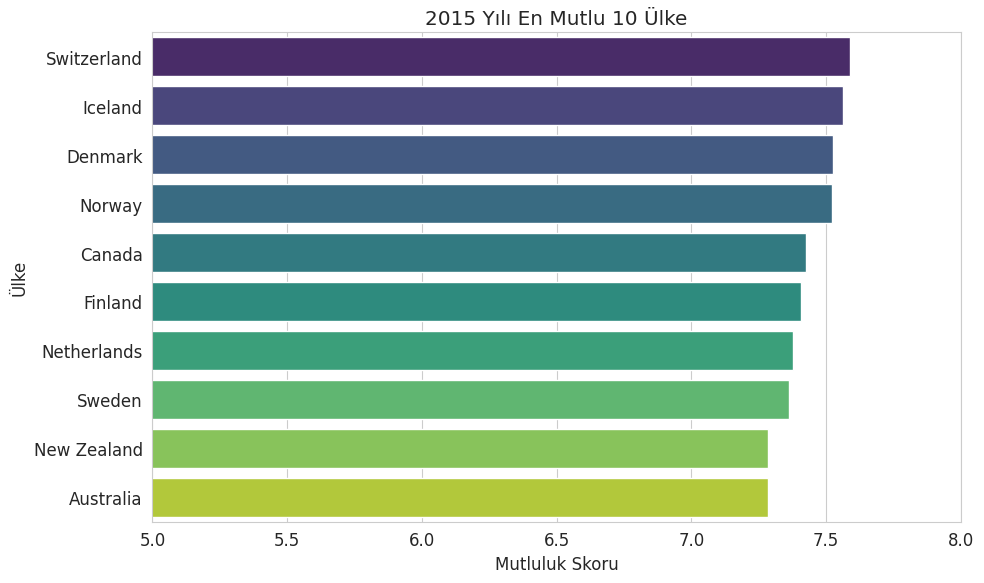

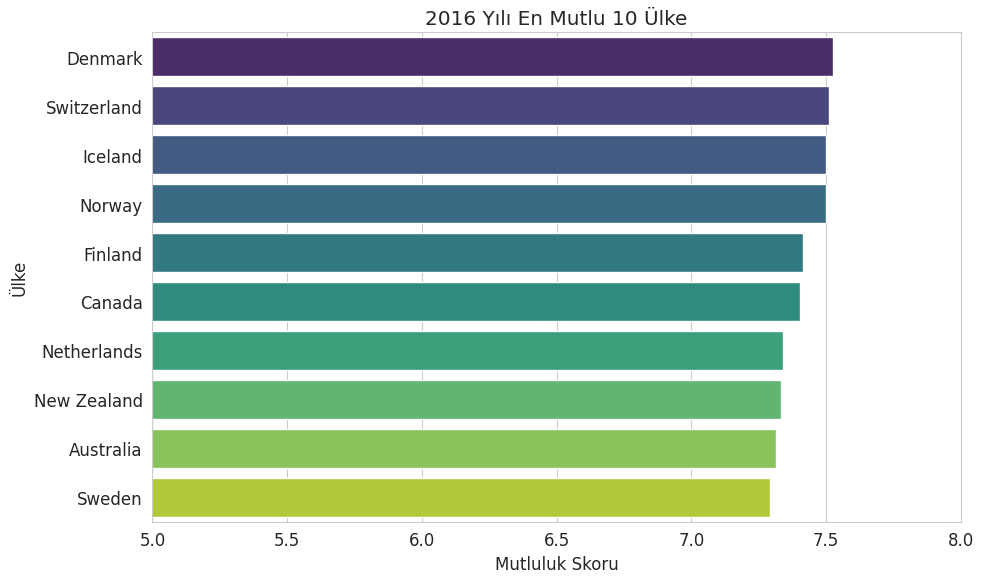

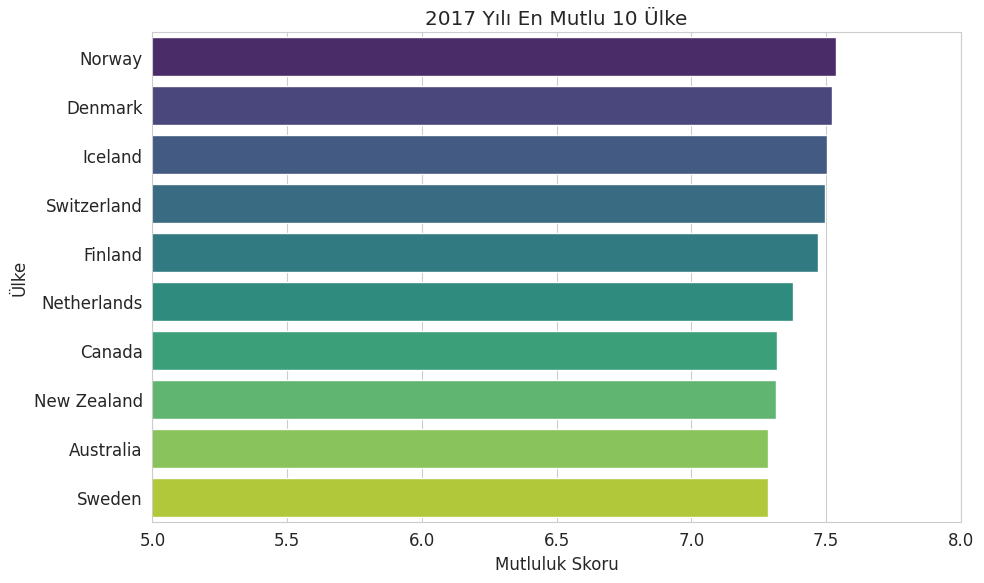


### Mutluluk Skoru ve Faktörler Arası Korelasyon Isı Haritası (2017)


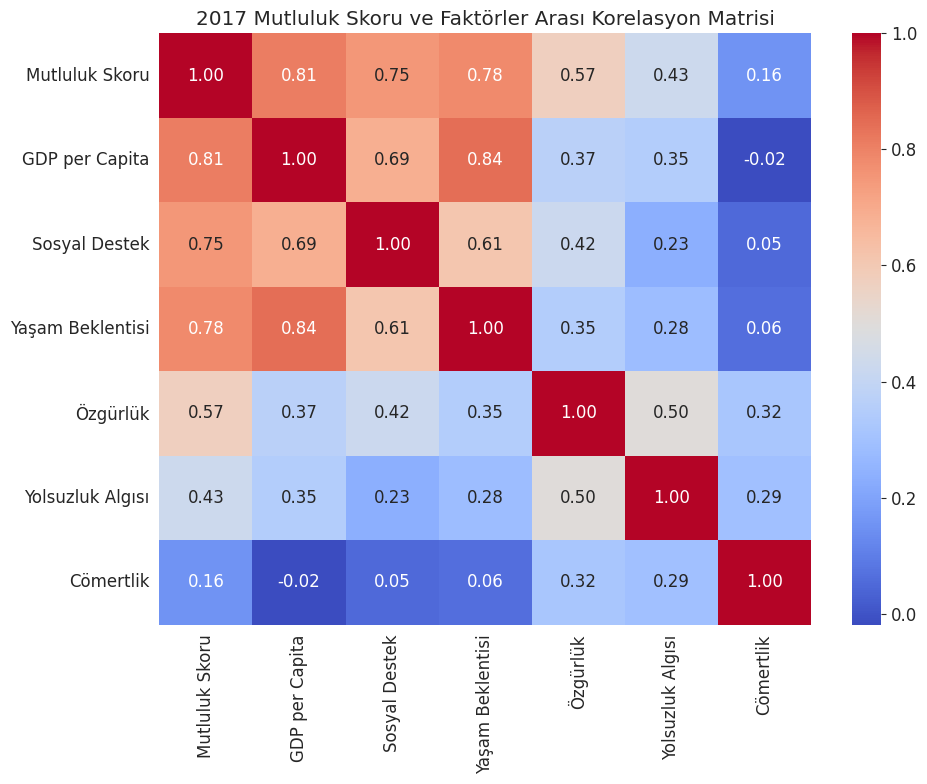

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

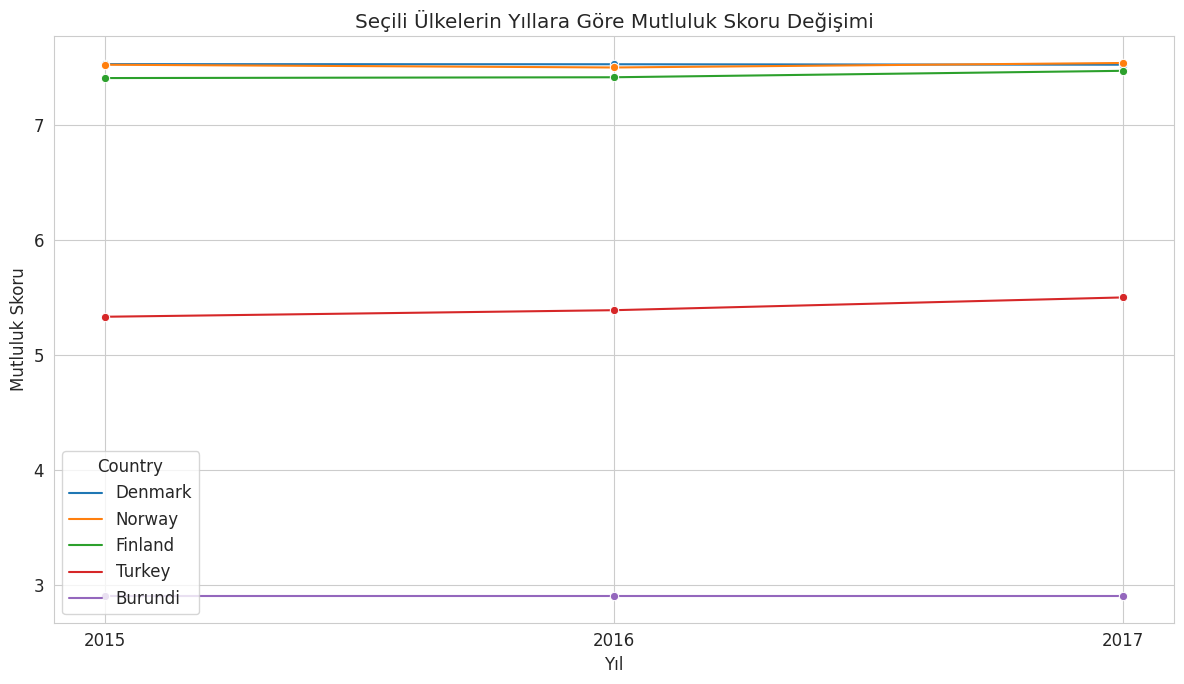

In [8]:
# Her yıl için ilk 10 ülkenin mutluluk skorlarını görselleştirme
print("\n### Mutluluk Skorlarının Yıllara Göre En Yüksek Ülkeler Grafikleri")
for year in sorted(df_all['Yıl'].unique()):
    top_10_countries = df_all[df_all['Yıl'] == year].sort_values(by='Mutluluk Skoru', ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Mutluluk Skoru', y='Country', data=top_10_countries, palette='viridis')
    plt.title(f'{year} Yılı En Mutlu 10 Ülke')
    plt.xlabel('Mutluluk Skoru')
    plt.ylabel('Ülke')
    plt.xlim(5, 8) # Mutluluk skoru genellikle 0-8 arasında değiştiği için
    plt.tight_layout()
    plt.show()

# Mutluluk Skoru ve Belirleyici Faktörler Arasındaki Korelasyonu Görselleştirme (2017 örneği)
print("\n### Mutluluk Skoru ve Faktörler Arası Korelasyon Isı Haritası (2017)")
df_2017_corr = df_2017[['Mutluluk Skoru', 'GDP per Capita', 'Sosyal Destek', 'Yaşam Beklentisi', 'Özgürlük', 'Yolsuzluk Algısı', 'Cömertlik']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_2017_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('2017 Mutluluk Skoru ve Faktörler Arası Korelasyon Matrisi')
plt.tight_layout()
plt.show()

# Belirli ülkelerin yıllara göre mutluluk skoru değişimi (Örnek: Finlandiya, Burundi, Türkiye)
selected_countries = ['Finland', 'Burundi', 'Turkey', 'Denmark', 'Norway']
df_selected_countries = df_all[df_all['Country'].isin(selected_countries)]

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_selected_countries, x='Yıl', y='Mutluluk Skoru', hue='Country', marker='o')
plt.title('Seçili Ülkelerin Yıllara Göre Mutluluk Skoru Değişimi')
plt.xlabel('Yıl')
plt.ylabel('Mutluluk Skoru')
plt.xticks(sorted(df_selected_countries['Yıl'].unique()))
plt.grid(True)
plt.tight_layout()
plt.show()

# ****🔍 Değerlendirme****
Bu görselleştirme adımları, önceki analizlerimizden elde ettiğimiz sayısal verileri anlaşılır ve etkileyici grafiklere dönüştürerek projemizin bulgularını pekiştiriyor.

**📈 Mutluluk Skorlarının Yıllara Göre En Yüksek Ülkeler Grafikleri**
Her yıl için oluşturulan çubuk grafikler, genel mutlulukta en yüksek 10 ülkeyi net bir şekilde gösterir. Bu grafiklerden çıkarabileceğimiz ana sonuçlar şunlardır:

**Tutarlı Zirve:** 2015, 2016 ve 2017 yıllarında listenin başını çeken ülkelerin (İskandinav ülkeleri, İsviçre, Kanada gibi) yüksek mutluluk skorlarını koruduğu ve bu skorların birbirine çok yakın olduğu açıkça görülür. Bu, bu ülkelerdeki refah seviyesinin ve toplumsal yapının istikrarlı olduğunu vurgular.

**Küçük Değişimler:** Yıllar arasında sıralamalarda küçük oynamalar olsa da (örneğin Danimarka veya Norveç'in birinciliği alması), ilk 10'daki ülkeler genellikle aynı kalır, bu da küresel mutluluk liderlerinin nispeten sabit olduğunu gösterir.

**🌡️ Mutluluk Skoru ve Faktörler Arası Korelasyon Isı Haritası (2017)**
Bu ısı haritası, mutluluk skoru ile onu etkileyen altı faktör arasındaki ilişkilerin gücünü ve yönünü görselleştirir. 2017 yılı verileri üzerinden elde edilen bu korelasyonlar, mutluluğun itici güçlerini anlamak için çok değerlidir:

**Güçlü Pozitif Korelasyonlar:** Mutluluk Skoru ile GDP per Capita, Sosyal Destek ve Yaşam Beklentisi arasında çok güçlü pozitif korelasyonlar (0.7 ile 0.8 civarı) gözlemlenir. Bu, bir ülkedeki ekonomik zenginliğin, güçlü sosyal bağların ve uzun, sağlıklı yaşamın genel mutluluk üzerinde en büyük etkiye sahip olduğunu açıkça gösterir.

**Orta Düzey Pozitif Korelasyonlar:** Özgürlük ve Yolsuzluk Algısı (düşük yolsuzluk algısı, yani yüksek puan) da mutluluk skoruyla orta düzeyde pozitif korelasyonlar (0.5 ile 0.6 civarı) gösterir. Bu faktörler de mutluluğun önemli bileşenleridir.

**Daha Zayıf Korelasyon:** Cömertlik genellikle diğer faktörlere kıyasla mutluluk skoruyla daha zayıf bir pozitif korelasyon sergiler, ancak yine de anlamlı bir ilişkiyi temsil eder.

**Faktörler Arası İlişkiler:** Isı haritası ayrıca faktörlerin kendi aralarındaki ilişkileri de gösterir. Örneğin, GDP per Capita ile Yaşam Beklentisi arasında genellikle yüksek bir pozitif korelasyon bulunur, zira zengin ülkeler genellikle daha iyi sağlık hizmetleri sunar.

**📉 Seçili Ülkelerin Yıllara Göre Mutluluk Skoru Değişimi**
Seçtiğimiz Finlandiya, Burundi, Türkiye, Danimarka ve Norveç gibi ülkelerin yıllara göre mutluluk skoru değişimlerini gösteren çizgi grafiği, zaman içindeki trendleri dinamik olarak takip etmemizi sağlar:

**İstikrar ve Yüksek Mutluluk:** Finlandiya, Danimarka ve Norveç gibi ülkeler, tüm yıllar boyunca yüksek ve genellikle istikrarlı mutluluk skorlarını koruduklarını gösterir. Bu, mutluluk liderlerinin zaman içinde de bu konumlarını sürdürdüğünü teyit eder.

**Düşük Mutluluk ve Dalgalanmalar:** Burundi gibi ülkeler, tüm yıllar boyunca düşük mutluluk skorlarına sahip olduğunu ve bu seviyelerde önemli bir iyileşme olmadığını gösterir.

****Türkiye'nin Durumu:**** Türkiye'nin mutluluk skorundaki seyir, diğer seçili ülkelerle karşılaştırmalı olarak incelendiğinde, belirli yıllarda dalgalanmalar veya genel trend içinde bir konumu olduğu görülebilir.

**Dinamik Değişimler:** Bu grafik, önceki analizlerimizde tespit ettiğimiz mutluluk skorlarındaki artış ve azalışları (örneğin Venezuela'nın düşüşü veya Cezayir'in dalgalanması gibi - bu grafikte olmasa da benzer analizler için faydalıdır) görsel olarak destekler.